In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import h5py
import os
import analysis

In [2]:
# read in h5 output
Lx, Lt = 16, 48
V = (Lx ** 3) * Lt

# jobid = 19910
jobid = 20401
k_list, mom_list = [], []
Z, Zq, σ, σZq = [], [], [], []
for mu in range(4):
    out_file = './analysis_output/job' + str(jobid) + '/O' + str(mu + 1) + str(mu + 1) + '.h5'
    ks, ms, Zboot, Zqboot, cfgnum = analysis.load_data_h5(out_file)
    k_list.append(ks)
    mom_list.append(ms)
    Z.append(np.mean(Zboot, axis = 1))
    σ.append(np.std(Zboot, axis = 1))
    Zq.append(np.mean(Zqboot, axis = 1))
    σZq.append(np.std(Zqboot, axis = 1))

Loading ./analysis_output/job20401/O11.h5.
Loading ./analysis_output/job20401/O22.h5.
Loading ./analysis_output/job20401/O33.h5.
Loading ./analysis_output/job20401/O44.h5.


TODO: Can only convert operators in hypercubic irreps to MS bar! Not individual operators

<IPython.core.display.Javascript object>


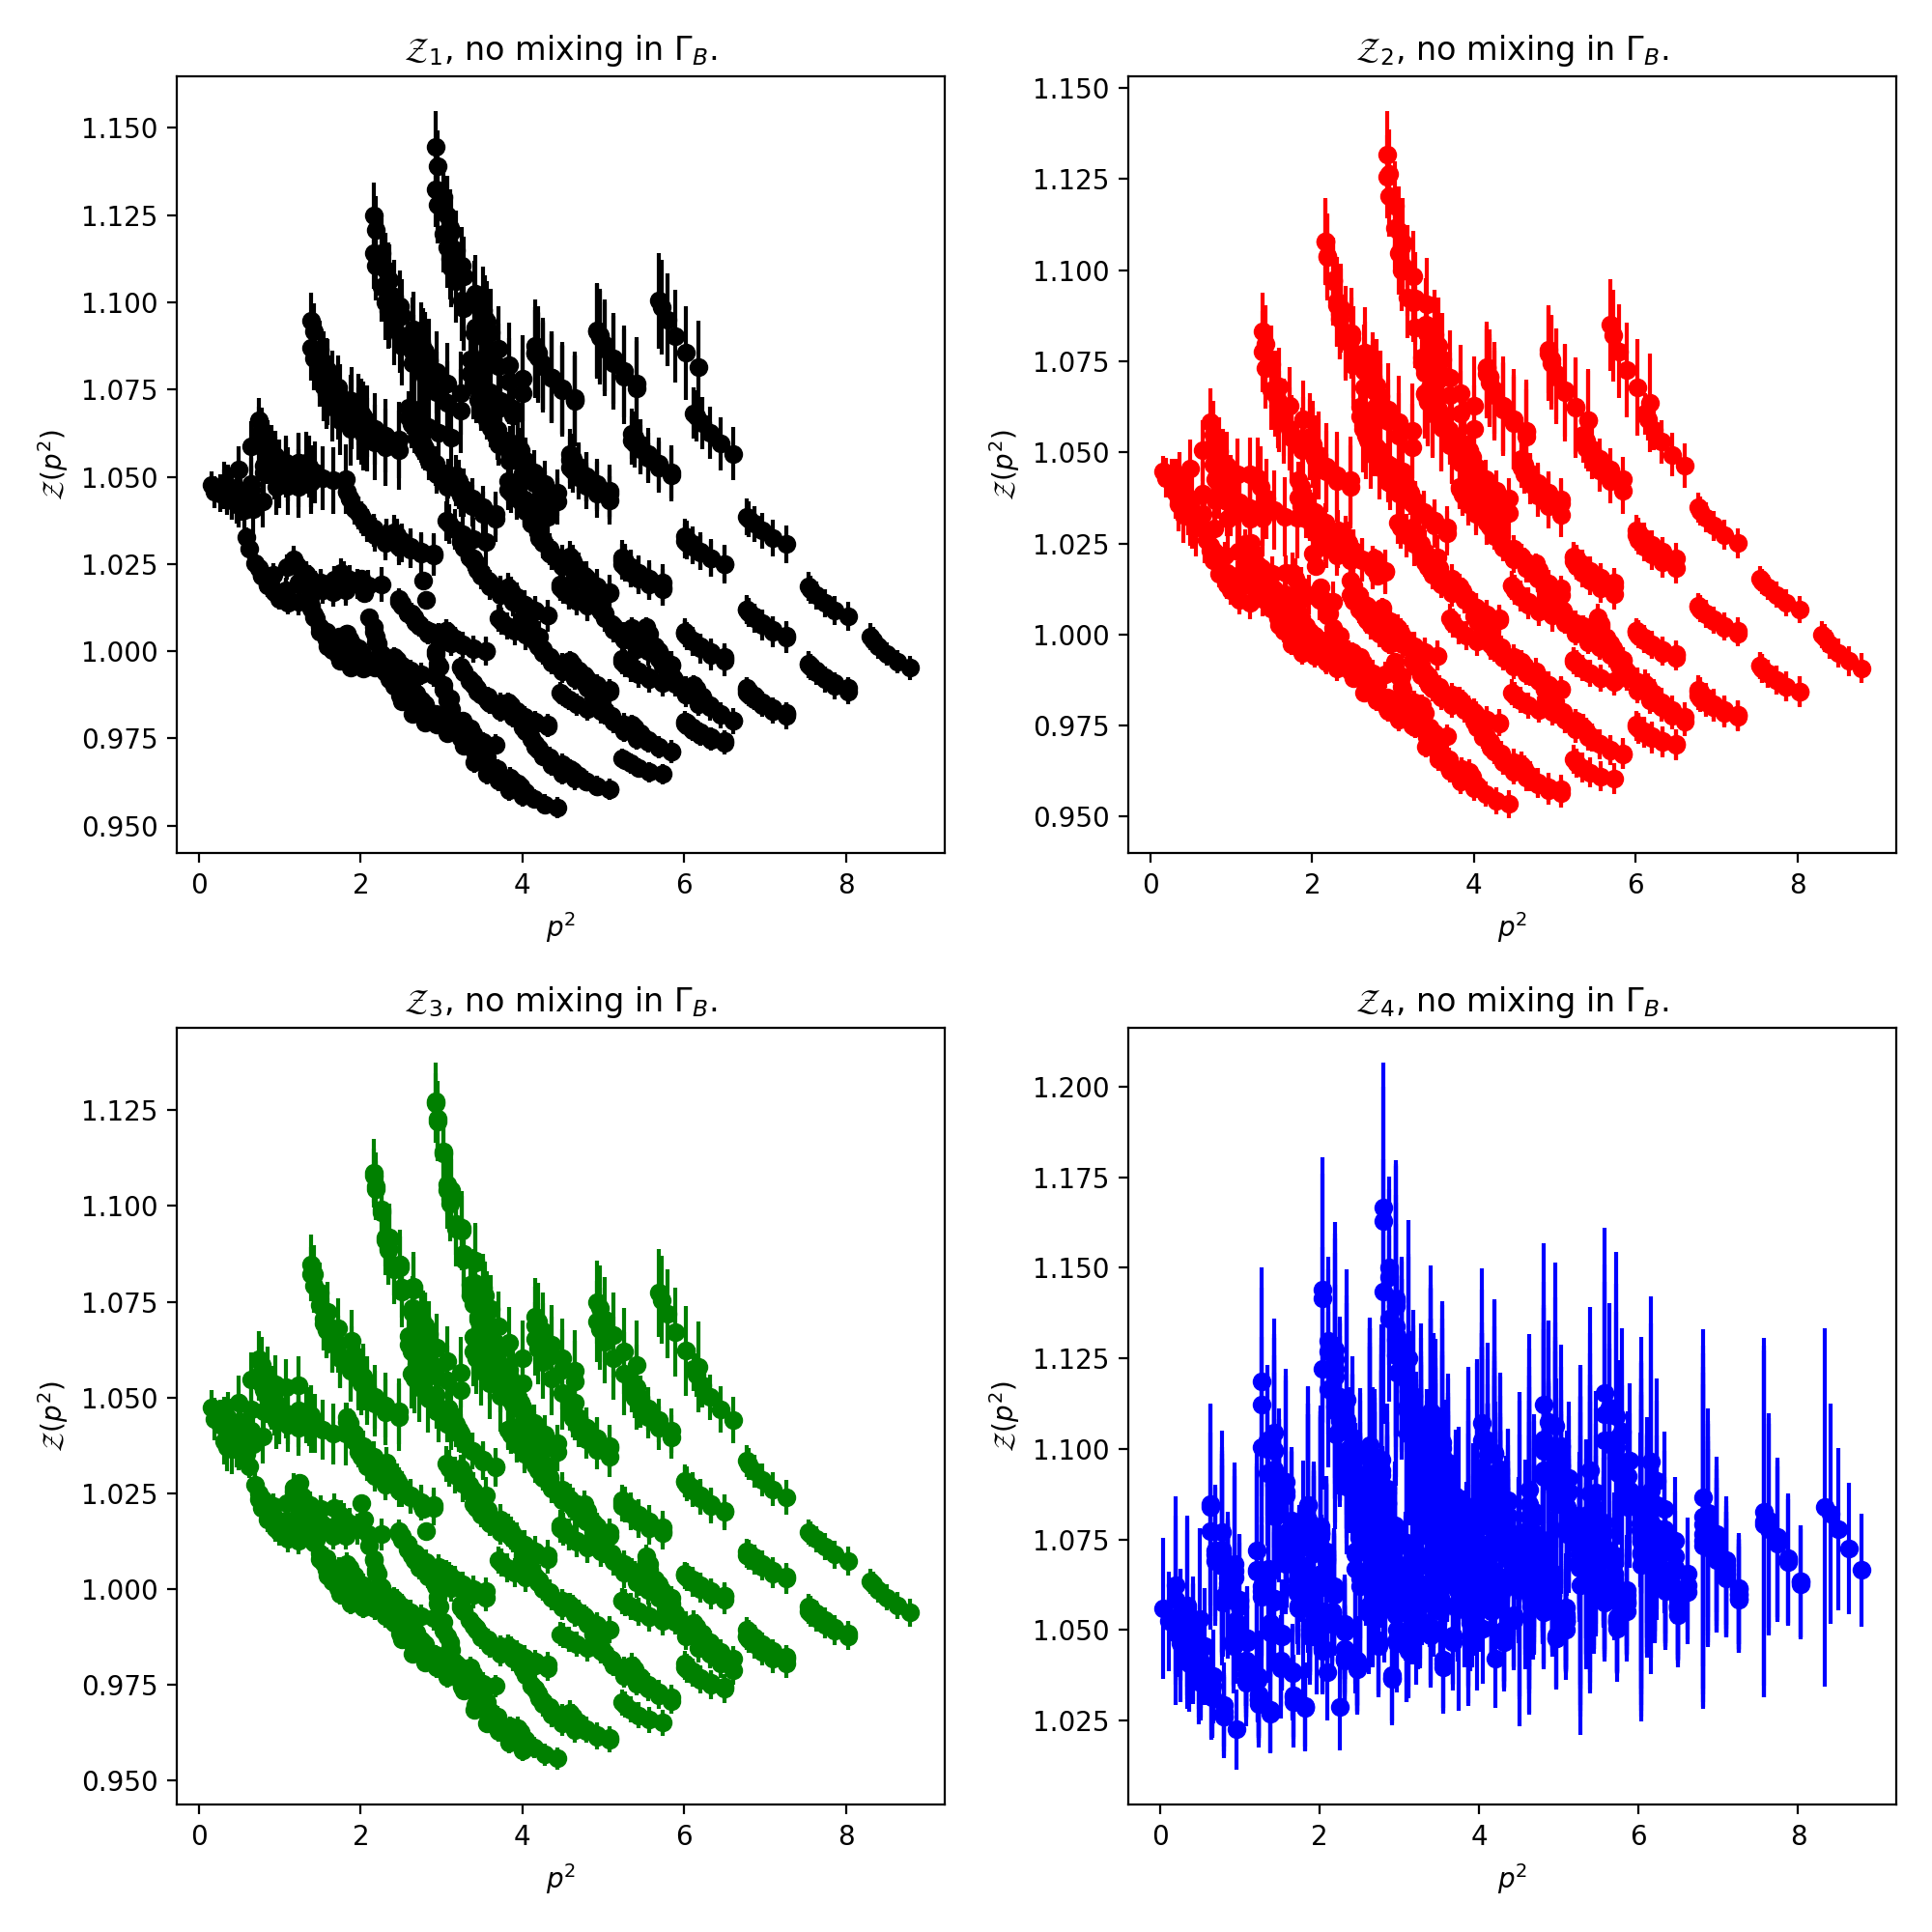

In [3]:
# size = (10, 5)
size = (10, 10)
f, ax = plt.subplots(2, 2, figsize = size)
# f, ax = plt.subplots(4, 2, figsize = (8, 20))
p_squared = [np.array([np.abs(analysis.square(p)) for p in mom_list_i]) for mom_list_i in mom_list]
colors = ['k', 'r', 'g', 'b']

for mu in range(4):
    ax[mu // 2][mu % 2].errorbar(p_squared[mu], np.real(Z[mu]), yerr = np.abs(σ[mu]), fmt = 'o', c = colors[mu], label = 'RI-MOM')
    ax[mu // 2][mu % 2].set_title('$\mathcal{Z}_' + str(mu + 1) + '$, no mixing in $\Gamma_B$.')
    ax[mu // 2][mu % 2].set_xlabel('$p^2$')
    ax[mu // 2][mu % 2].set_ylabel('$\mathcal{Z}(p^2)$')
#     ax[mu // 2][mu % 2].legend()
plt.tight_layout()
plt.show()

In [4]:
# plt.savefig('/Users/theoares/lqcd/npr_momfrac/analysis_output/Plots/19910/renorm_coeffs.pdf')

In [5]:
wall_src_file = '/Users/theoares/lqcd/npr_momfrac/analysis_output/jobZq19214/Zq.h5'
wk, wp, wZq = analysis.load_Zq(wall_src_file)
psquared_Zq = np.real(np.array([analysis.square(p) for p in wp]))
Zq_wall = np.mean(wZq, axis = 1)
σZq_wall = np.std(wZq, axis = 1)

<IPython.core.display.Javascript object>


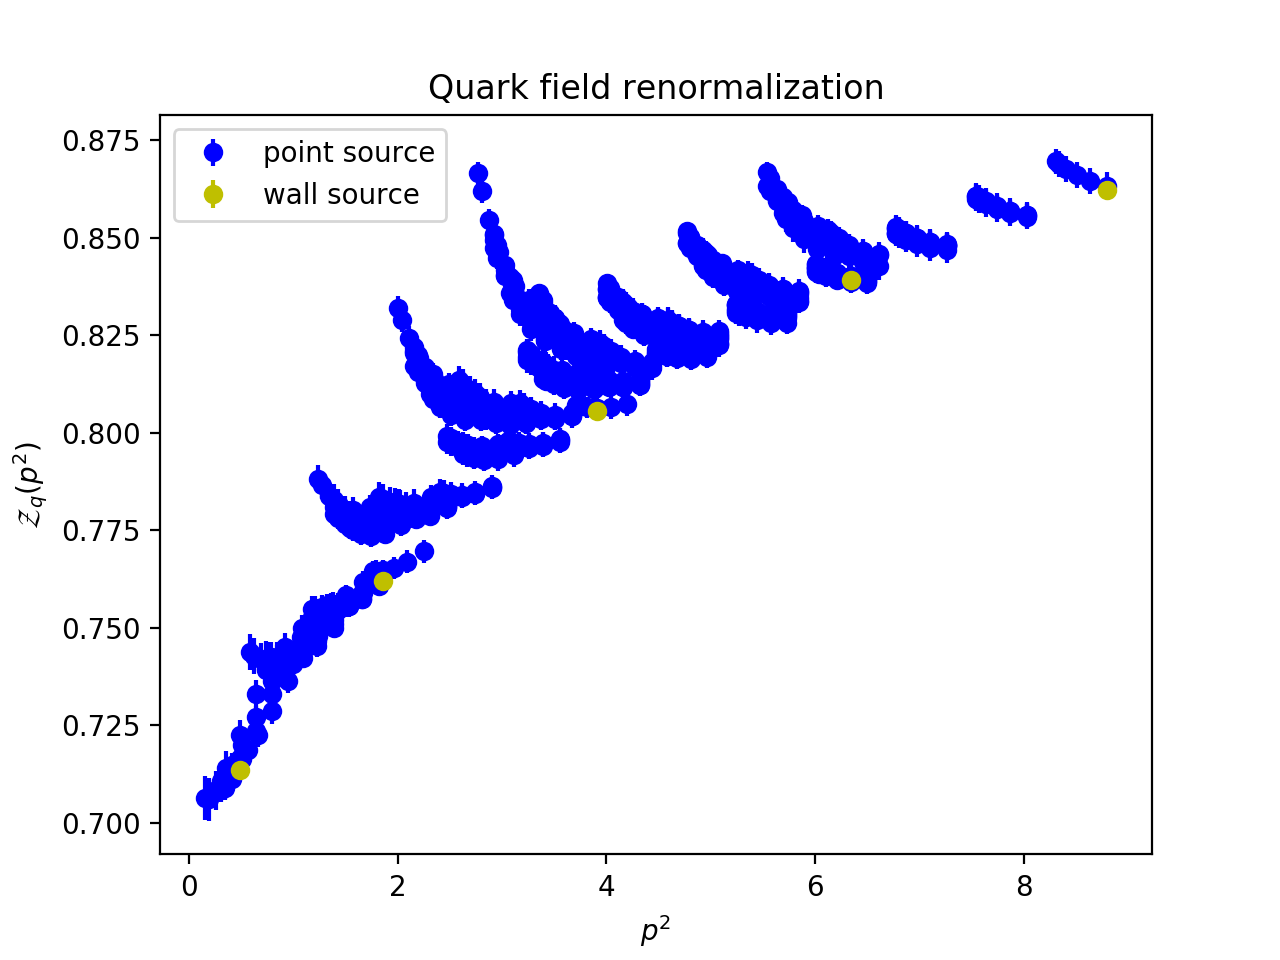

In [6]:
plt.figure()
plt.errorbar(p_squared[2], np.real(Zq[2]), yerr = np.real(σZq[0]), fmt = 'o', c = 'b', label = 'point source')
plt.ylabel('$\mathcal{Z}_q(p^2)$')
plt.xlabel('$p^2$')
plt.title('Quark field renormalization')

plt.errorbar(psquared_Zq, np.real(Zq_wall), yerr = np.real(σZq_wall), fmt = 'o', c = 'y', label = 'wall source')
plt.legend()
plt.show()

In [7]:
# plt.savefig('/Users/theoares/lqcd/npr_momfrac/analysis_output/Plots/19910/quark_renorm.pdf')

In [8]:
# psub = subset of sink momenta to graph
# props_sub = subset of propagators to use (number of graphs to show)
# label = if True, will label each point with its momenta
# def graph_subset(ksub, psub, props_sub, ms = True, label = False):
def graph_subset(indices, ms = True, label = False):
    f, ax = plt.subplots()
    p_squared_sub = p_squared[indices]
    if ms:
        Zsub = Z_MSbar_avg[indices]
    else:
        Zsub = Z_avg[indices]
    σsub = σ[indices]
    ax.errorbar(p_squared_sub, np.real(Zsub), yerr = np.abs(σsub), fmt = 'o')
    if label:
        for i, ii in enumerate(indices):
            ax.annotate(k_list[ii], (p_squared_sub[i], np.real(Zsub[i])))
    ax.set_xlabel('$p^2$')
    ax.set_ylabel('$\mathcal{Z}(p^2)$')
    ax.set_title('Subset of momenta')
    plt.tight_layout()
    plt.show()
def graph_subset_error(psub, props_sub, label = False):
    num_subplots = (int(np.ceil(len(props_sub) / 2)), 2)
    f, ax = plt.subplots(num_subplots[0], num_subplots[1], figsize = (10, 10))
    ax = ax.flatten()
    p_squared_sub = np.array([np.abs(analysis.square(p)) for p in psub])
    for idx, mom in enumerate(props_sub):
        rsquaredsub = [analysis.square(np.array(p) - np.array(mom)) for p in psub]
        σsub = np.array([σ[idx][analysis.plist_to_string(p)] for p in psub])
        ax[idx].scatter(rsquaredsub, σsub)
        if label:
            for i, r in enumerate(rsquaredsub):
                ax[idx].annotate(psub[i], (r, σsub[i]))
        ax[idx].set_xlabel('$|p - p_{prop}|^2$')
        ax[idx].set_ylabel('Error')
        ax[idx].set_title('Prop momentum = ' + str(prop_list[idx]))
    plt.tight_layout()
    plt.show()

In [9]:
# np.savetxt('/Users/theoares/lqcd/npr_momfrac/analysis_output/psub_2_17999.txt', psub, delimiter = ',')

## Plot irreps

In [10]:
jobid = 22812    # this job was run specifically with the irreps in QLUA
# jobid = 20401
irrep_file = './analysis_output/job' + str(jobid) + '/Z_irreps.h5'
fi = h5py.File(irrep_file, 'r')
ki_list = fi['momenta']
pi_squared = np.real(np.array([np.abs(analysis.square(analysis.to_lattice_momentum(k))) for k in ki_list]))
Zi1 = fi['Z1'][()]
Zi2 = fi['Z2'][()]
Zi3 = fi['Z3'][()]
Ziq = fi['Zq'][()]    # should be the same as above

Zi1_μ = np.mean(Zi1, axis = 1)
Zi1_σ = np.std(Zi1, axis = 1)
Zi2_μ = np.mean(Zi2, axis = 1)
Zi2_σ = np.std(Zi2, axis = 1)
Zi3_μ = np.mean(Zi3, axis = 1)
Zi3_σ = np.std(Zi3, axis = 1)
Ziq_μ = np.mean(Ziq, axis = 1)
Ziq_σ = np.std(Ziq, axis = 1)

<IPython.core.display.Javascript object>


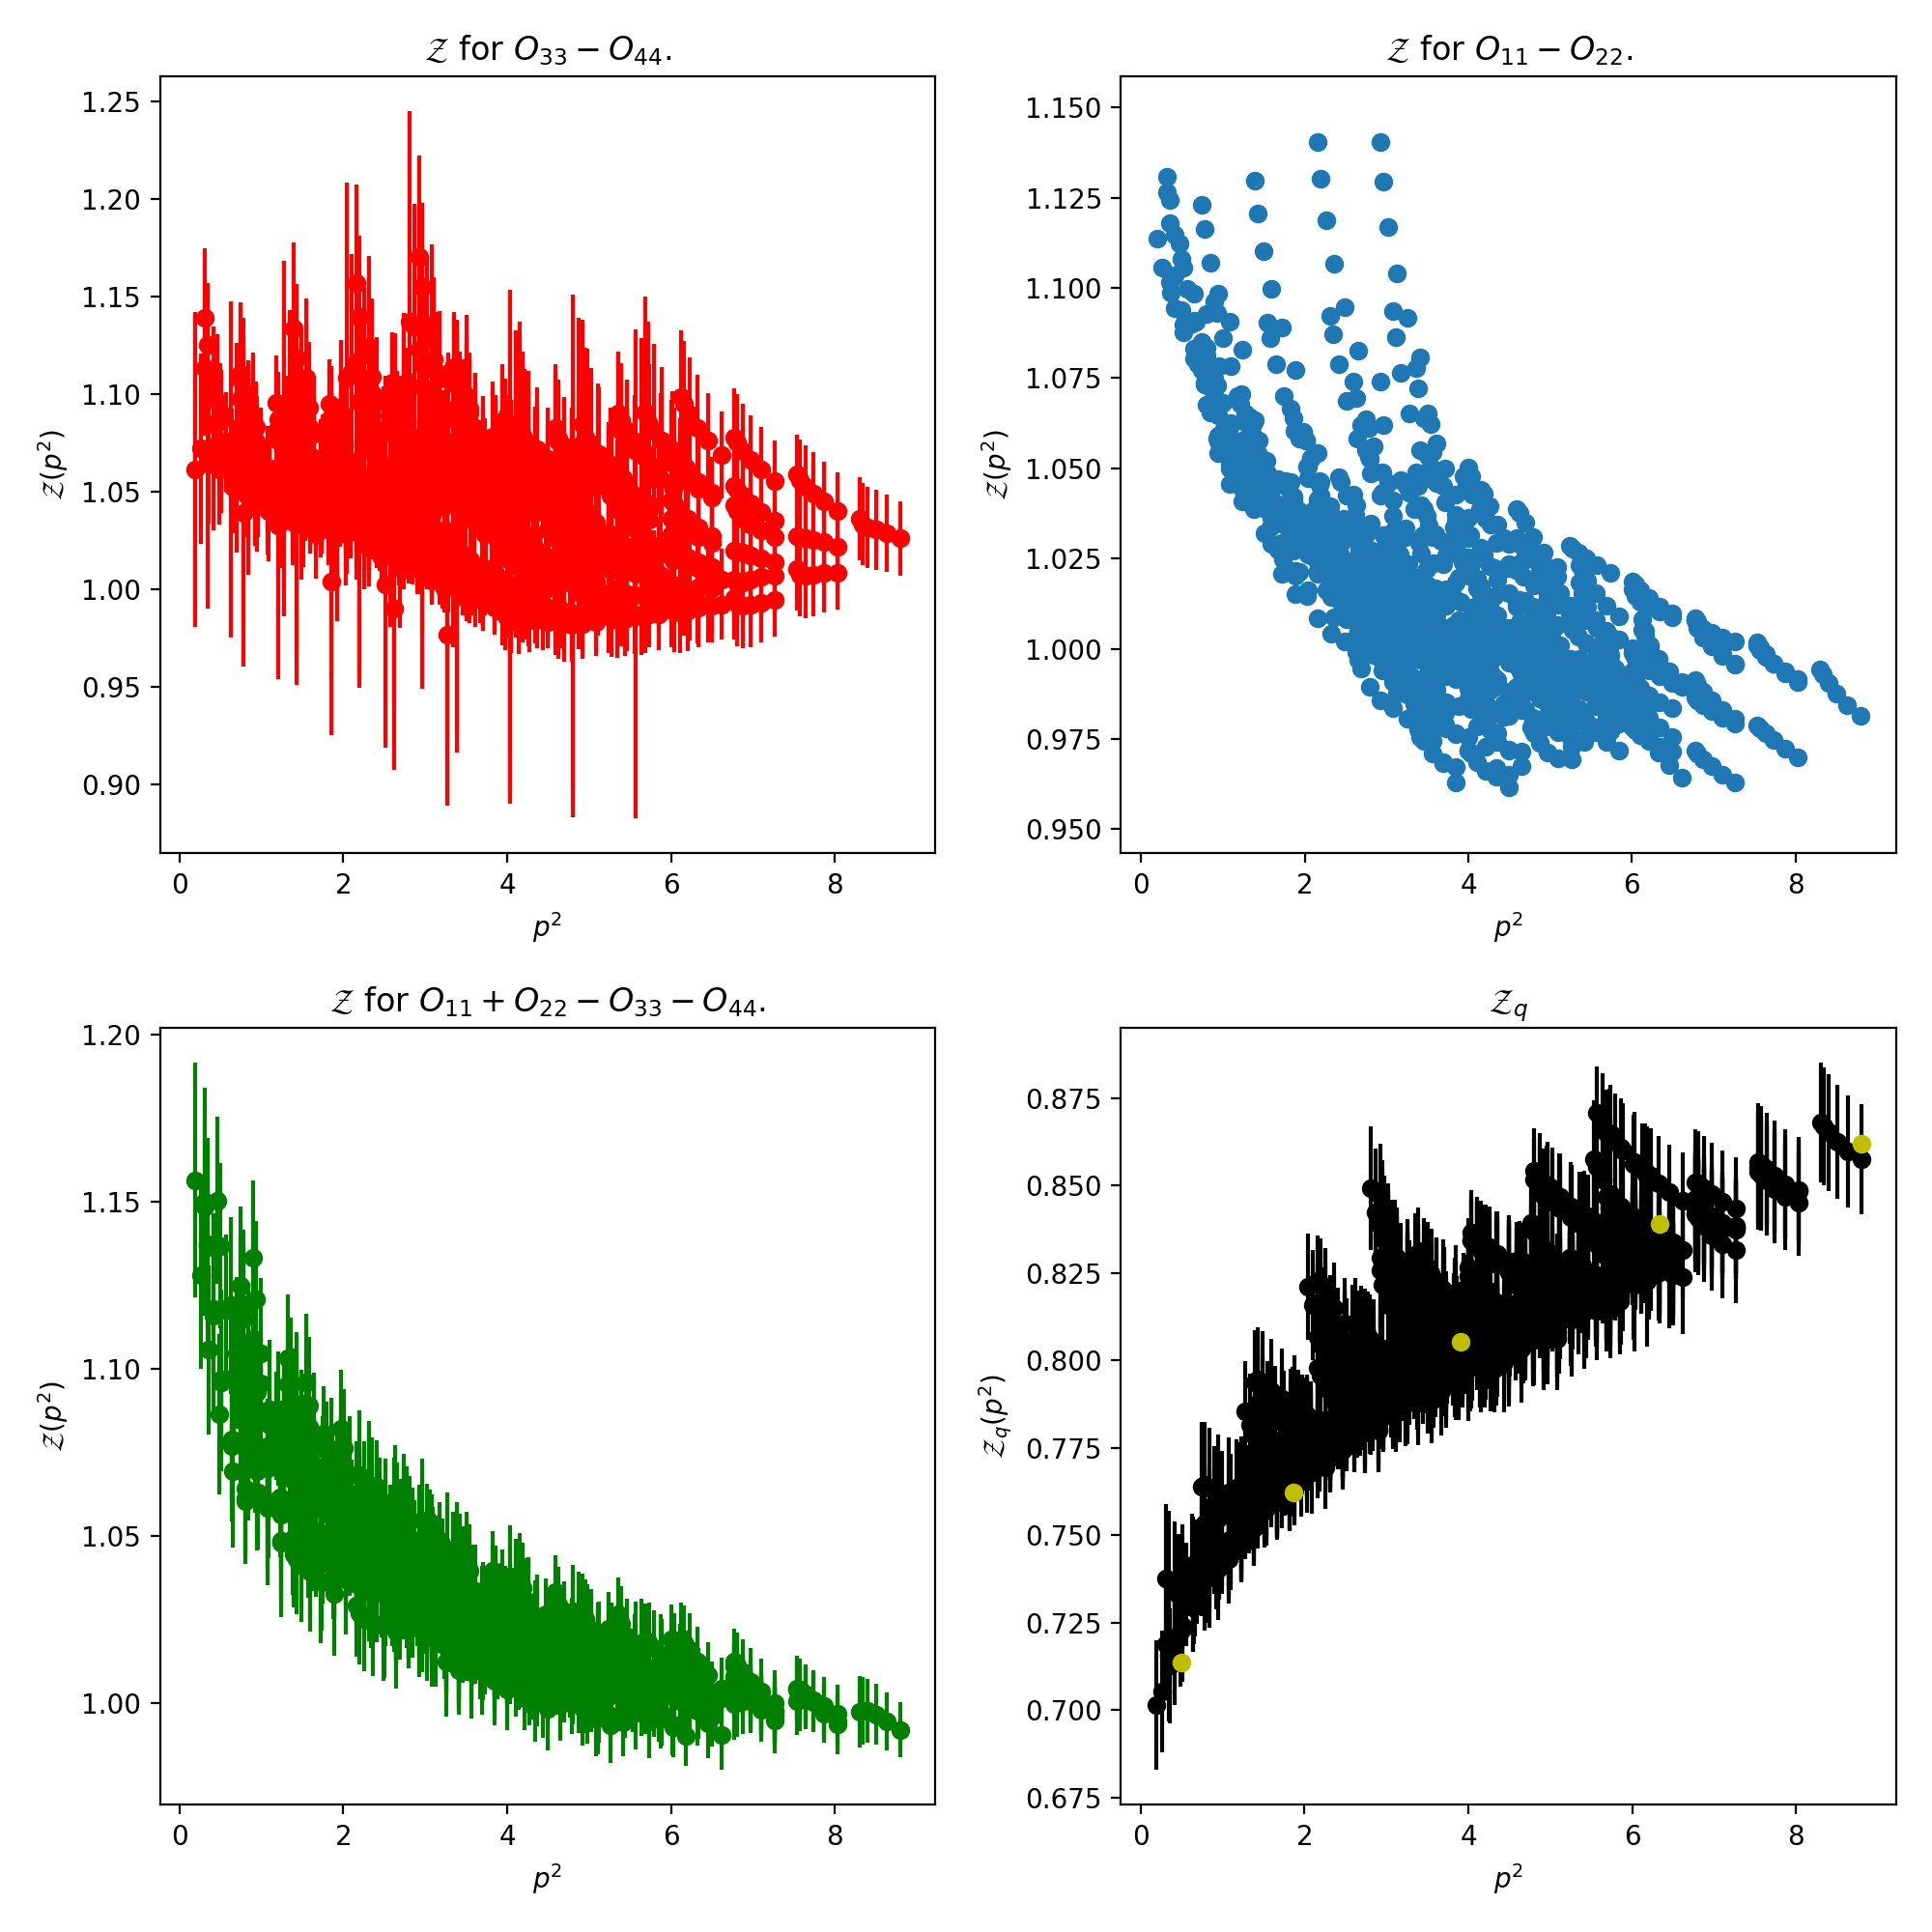

In [11]:
fi, axi = plt.subplots(2, 2, figsize = (10, 10))

axi[0, 0].errorbar(pi_squared, np.real(Zi1_μ), yerr = np.real(Zi1_σ), fmt = 'o', c = 'r')
axi[0, 0].set_title('$\mathcal{Z}$ for $O_{33} - O_{44}$.')
axi[0, 0].set_xlabel('$p^2$')
axi[0, 0].set_ylabel('$\mathcal{Z}(p^2)$')

# axi[0, 1].errorbar(pi_squared, np.real(Zi2_μ), yerr = np.real(Zi2_σ), fmt = 'o', c = 'b')
axi[0, 1].scatter(pi_squared, np.real(Zi2_μ))
axi[0, 1].set_title('$\mathcal{Z}$ for $O_{11} - O_{22}$.')
axi[0, 1].set_xlabel('$p^2$')
axi[0, 1].set_ylabel('$\mathcal{Z}(p^2)$')

axi[1, 0].errorbar(pi_squared, np.real(Zi3_μ), yerr = np.real(Zi3_σ), fmt = 'o', c = 'g')
axi[1, 0].set_title('$\mathcal{Z}$ for $O_{11} + O_{22} - O_{33} - O_{44}$.')
axi[1, 0].set_xlabel('$p^2$')
axi[1, 0].set_ylabel('$\mathcal{Z}(p^2)$')

axi[1, 1].errorbar(pi_squared, np.real(Ziq_μ) / V, yerr = np.real(Ziq_σ) / V, fmt = 'o', c = 'k', label = 'point source')
axi[1, 1].errorbar(psquared_Zq, np.real(Zq_wall), yerr = np.real(σZq_wall), fmt = 'o', c = 'y', label = 'wall source')
axi[1, 1].set_title('$\mathcal{Z}_q$')
axi[1, 1].set_xlabel('$p^2$')
axi[1, 1].set_ylabel('$\mathcal{Z}_q(p^2)$')

plt.tight_layout()
plt.show()

In [12]:
# plt.savefig('/Users/theoares/lqcd/npr_momfrac/analysis_output/Plots/20401/Z_irreps.pdf')

## Mixing analysis

In [13]:
mix_num = 22454
mix_file = './analysis_output/mixing_job' + str(mix_num) + '/Pi.h5'
fm = h5py.File(mix_file, 'r')
Pi11 = fm['Pi11'][()]
Pi12 = fm['Pi12'][()]
Zq_mix = fm['Zq'][()]
k_list_mix = fm['momenta'][()]
p_squared_mix = np.array([np.abs(analysis.square(analysis.to_lattice_momentum(k))) for k in k_list_mix])

# Z11 = 1 / Pi11
# Z12 = 1 / Pi12
Z11 = Zq_mix / Pi11
Z12 = Zq_mix / Pi12

Pi11_μ = np.mean(Pi11, axis = 1)
Pi11_σ = np.std(Pi11, axis = 1)
Pi12_μ = np.mean(Pi12, axis = 1)
Pi12_σ = np.std(Pi12, axis = 1)

Z11_μ = np.mean(Z11, axis = 1)
Z11_σ = np.std(Z11, axis = 1)
Z12_μ = np.mean(Z12, axis = 1)
Z12_σ = np.std(Z12, axis = 1)

Zq_mix_μ = np.mean(Zq_mix, axis = 1)
Zq_mix_σ = np.std(Zq_mix, axis = 1)

In [14]:
# to_remove = np.where(Z11_σ > .1)    # a few points have huge uncertainties, so can remove them
# print('Removing ' + str(len(to_remove[0])) + ' points.')
# k_list_rm = np.delete(k_list_mix, to_remove, axis = 0)
# p_squared_rm = np.delete(p_squared_mix, to_remove, axis = 0)
# Pi11_rm = np.delete(Pi11, to_remove, axis = 0)
# Pi12_rm = np.delete(Pi12, to_remove, axis = 0)
# Z11_μ_rm = np.delete(Z11_μ, to_remove, axis = 0)
# Z11_σ_rm = np.delete(Z11_σ, to_remove, axis = 0)
# Zq_rm = np.delete(Zq_mix, to_remove, axis = 0)

In [15]:
# f = h5py.File('/Users/theoares/lqcd/npr_momfrac/analysis_output/mixing_job' + str(mix_num) + '/Pi_subset.h5', 'w')
# f['momenta'] = k_list_rm
# f['Pi11'] = Pi11_rm
# f['Pi12'] = Pi12_rm
# f['Zq'] = Zq_rm

<IPython.core.display.Javascript object>


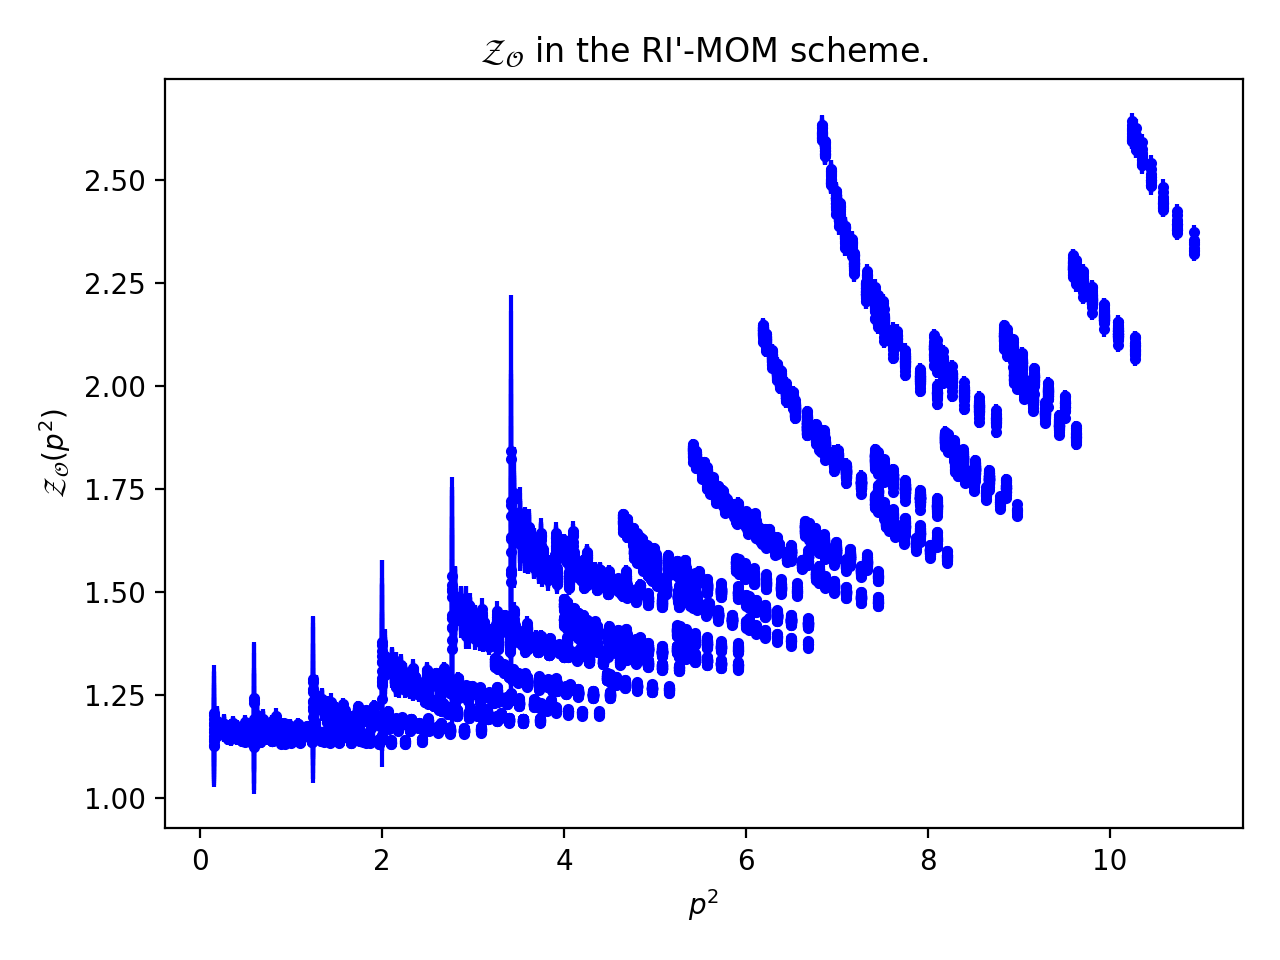

In [16]:
plt.figure()

plt.errorbar(p_squared_mix, np.real(Z11_μ), yerr = np.real(Z11_σ), fmt = '.', c = 'b')
# plt.errorbar(p_squared_rm, np.real(Z11_μ_rm), yerr = np.real(Z11_σ_rm), fmt = 'o', c = 'r')
plt.title('$\mathcal{Z}_{\mathcal{O}}$ in the RI\'-MOM scheme.')
plt.xlabel('$p^2$')
plt.ylabel('$\mathcal{Z}_{\mathcal{O}}(p^2)$')

plt.tight_layout()
plt.show()

In [17]:
# plt.savefig('/Users/theoares/lqcd/writeups/npr_momfrac/ZRIMOM.pdf')

In [18]:
frat = h5py.File('./analysis_output/mixing_job22454/ratios_ptwid.h5', 'r')
fqrat = h5py.File('./analysis_output/mixing_job22454/Zqratios_ptwid.h5', 'r')
k_rat = frat['momenta'][()]
ratios = frat['ratios'][()]
qratios = fqrat['ratios'][()]
mus = [analysis.k_to_mu_ptwid(k) for k in k_rat]
C_inv = 1 / analysis.C_O()
Cq_inv = 1 / analysis.C_q()

<IPython.core.display.Javascript object>


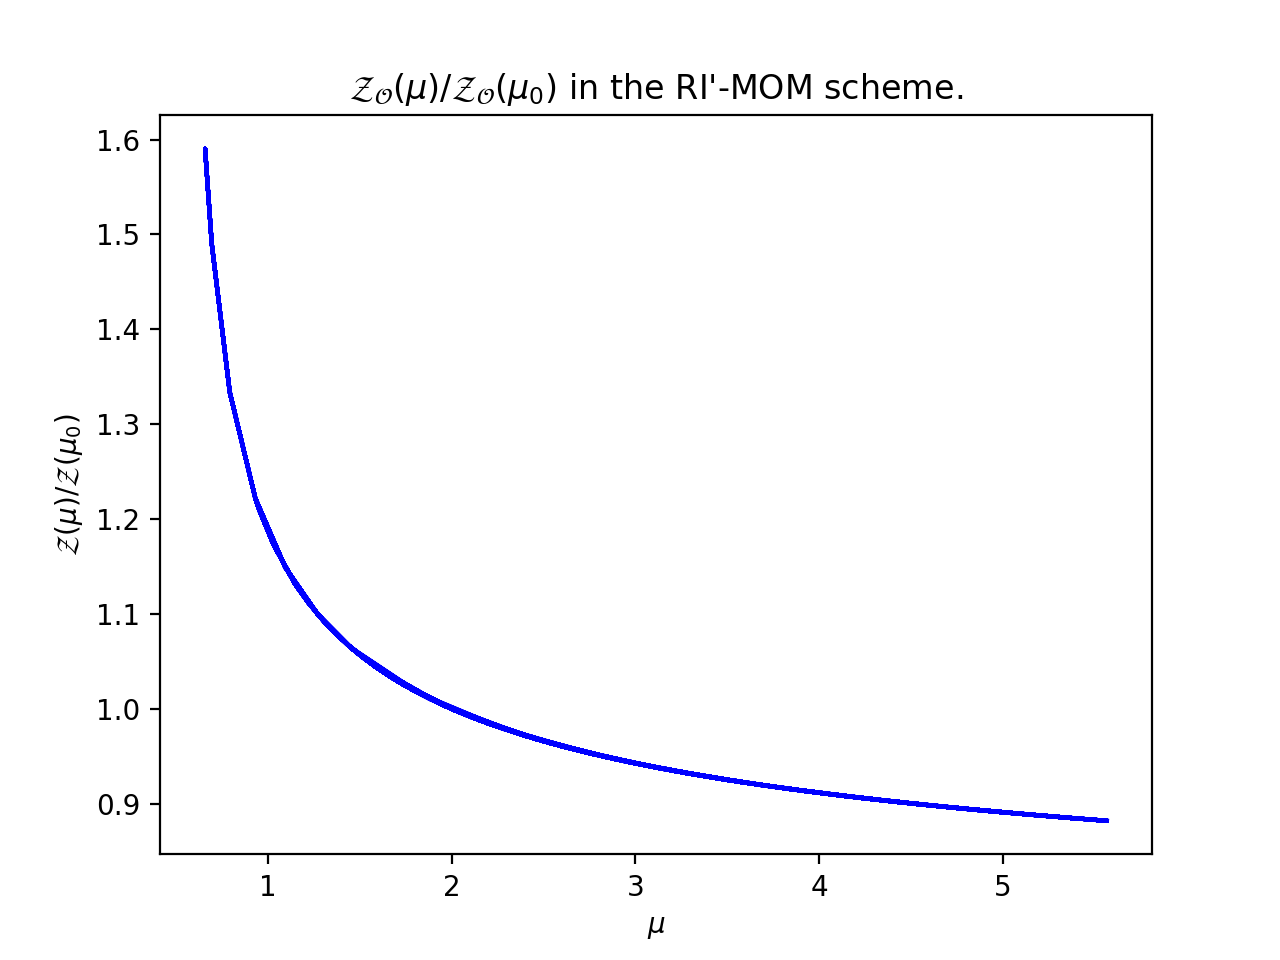

In [19]:
plt.figure()
plt.plot(mus, ratios, c = 'b')
plt.xlabel('$\mu$')
plt.ylabel('$\mathcal{Z}(\mu) / \mathcal{Z}(\mu_0)$')
plt.title('$\mathcal{Z}_{\mathcal{O}}(\mu) / \mathcal{Z}_{\mathcal{O}}(\mu_0)$ in the RI\'-MOM scheme.')
plt.show()

In [20]:
# plt.savefig('/Users/theoares/lqcd/npr_momfrac/analysis_output/Plots/22454/ratio_op.pdf')

In [21]:
# Convert to MSbar
ZMSbar = C_inv * np.einsum('p,pb->pb', 1 / ratios, Z11)
ZMSbar_μ = np.mean(ZMSbar, axis = 1)
ZMSbar_σ = np.std(ZMSbar, axis = 1)

ZqMSbar = Cq_inv * np.einsum('p,pb->pb', 1 / qratios, Zq_mix)
ZqMSbar_μ = np.mean(ZqMSbar, axis = 1)
ZqMSbar_σ = np.std(ZqMSbar, axis = 1)

<IPython.core.display.Javascript object>


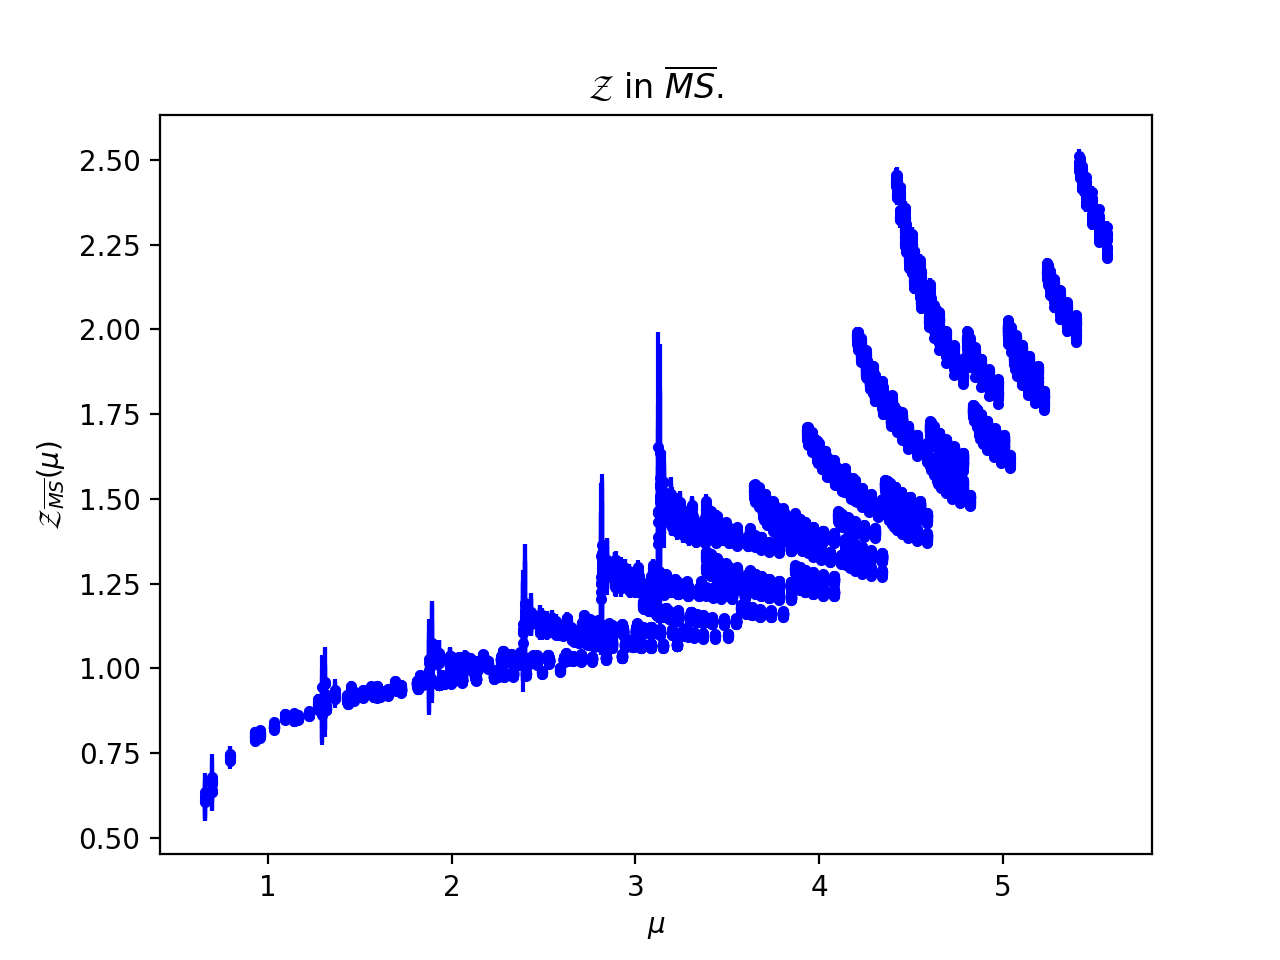

In [22]:
plt.figure()
plt.errorbar(mus, np.real(ZMSbar_μ), yerr = np.real(ZMSbar_σ), fmt = '.', c = 'b')
plt.title('$\mathcal{Z}$ in $\overline{MS}$.')
plt.xlabel('$\mu$')
plt.ylabel('$\mathcal{Z}_{\overline{MS}}(\mu)$')
plt.show()

In [23]:
# plt.savefig('/Users/theoares/lqcd/writeups/npr_momfrac/ZMSbar.pdf')

<IPython.core.display.Javascript object>


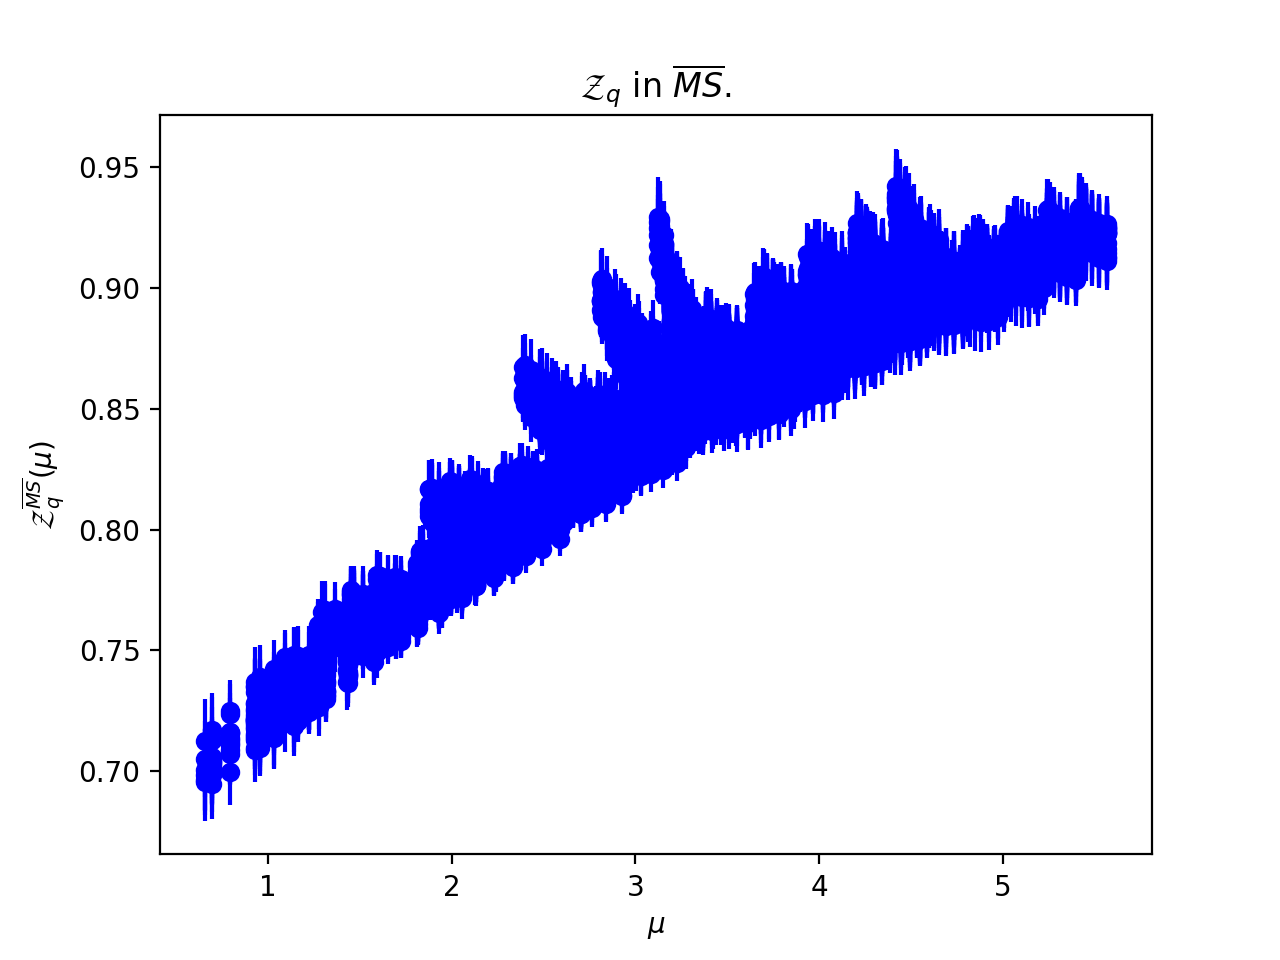

In [24]:
plt.figure()
plt.errorbar(mus, np.real(ZqMSbar_μ), yerr = np.real(ZqMSbar_σ), fmt = 'o', c = 'b')
plt.title('$\mathcal{Z}_q$ in $\overline{MS}$.')
plt.xlabel('$\mu$')
plt.ylabel('$\mathcal{Z}_q^{\overline{MS}}(\mu)$')
plt.show()

In [25]:
# out_file = '/Users/theoares/lqcd/npr_momfrac/analysis_output/mixing_job22454/Z_MSbar.h5'
# f = h5py.File(out_file, 'w')
# f['momenta'] = k_list_mix
# f['Z'] = ZMSbar
# f['Zq'] = ZqMSbar
# f.close()

<IPython.core.display.Javascript object>


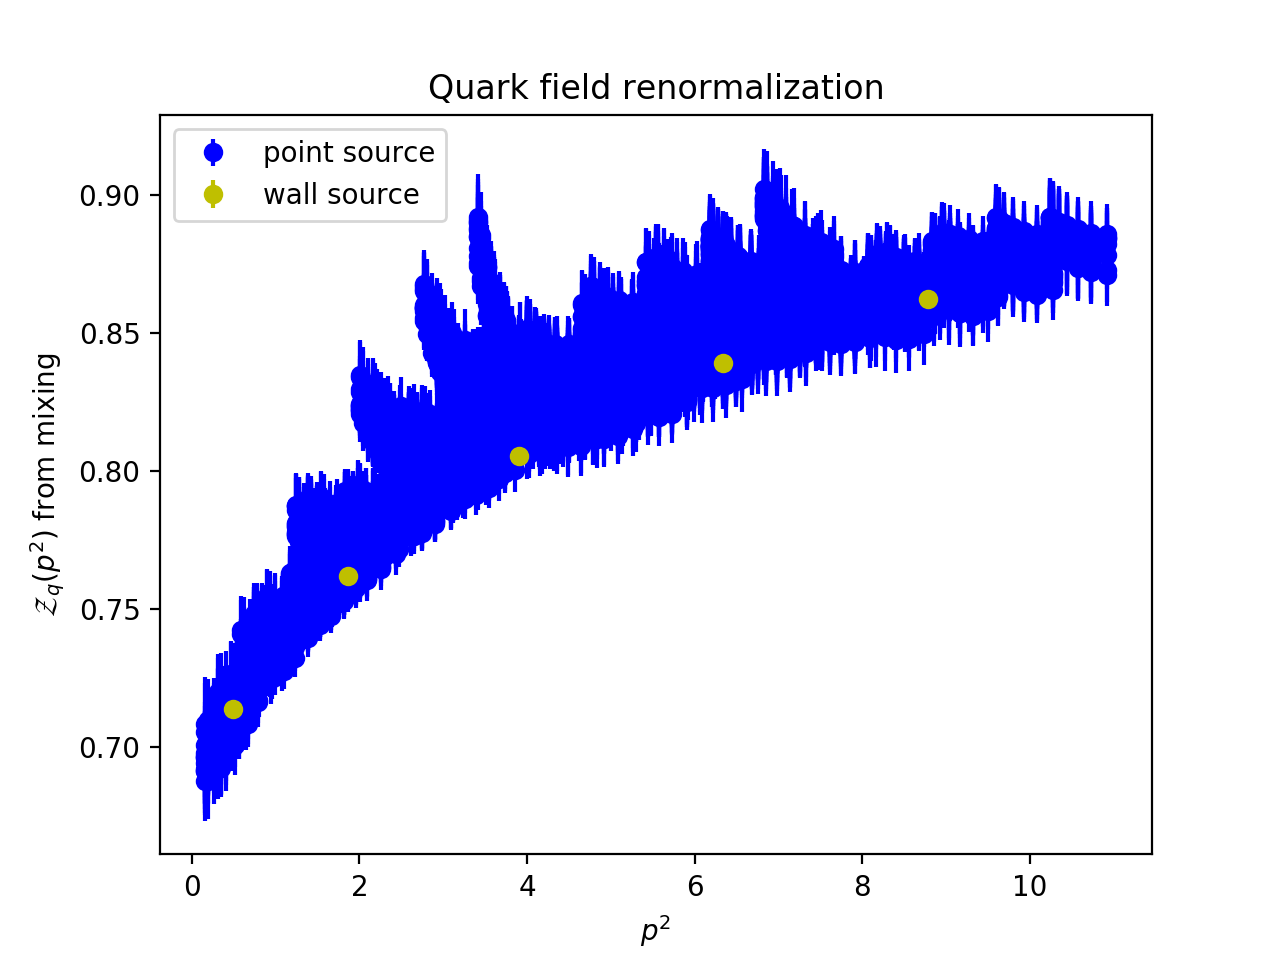

In [26]:
plt.figure()
plt.errorbar(p_squared_mix, np.real(Zq_mix_μ), yerr = np.real(Zq_mix_σ), fmt = 'o', c = 'b', label = 'point source')
plt.ylabel('$\mathcal{Z}_q(p^2)$ from mixing')
plt.xlabel('$p^2$')
plt.title('Quark field renormalization')

plt.errorbar(psquared_Zq, np.real(Zq_wall), yerr = np.real(σZq_wall), fmt = 'o', c = 'y', label = 'wall source')
plt.legend()
plt.show()

## Current Renormalization

In [27]:
currentid = 23014
current_file = './analysis_output/currents' + str(currentid) + '/Z.h5'    #'/Z.h5'
fc = h5py.File(current_file, 'r')
kc_list = fc['momenta'][()]
pc_squared = np.real(np.array([np.abs(analysis.square(analysis.to_lattice_momentum(k))) for k in kc_list]))
ZV = np.mean(fc['ZV'][()], axis = 0)
ZA = np.mean(fc['ZA'][()], axis = 0)
Zcq = fc['Zq'][()] / V    # should be the same as above

ZV_μ = np.mean(ZV, axis = 1)
ZV_σ = np.std(ZV, axis = 1)
ZA_μ = np.mean(ZA, axis = 1)
ZA_σ = np.std(ZA, axis = 1)
Zcq_μ = np.mean(Zcq, axis = 1)
Zcq_σ = np.std(Zcq, axis = 1)

<IPython.core.display.Javascript object>


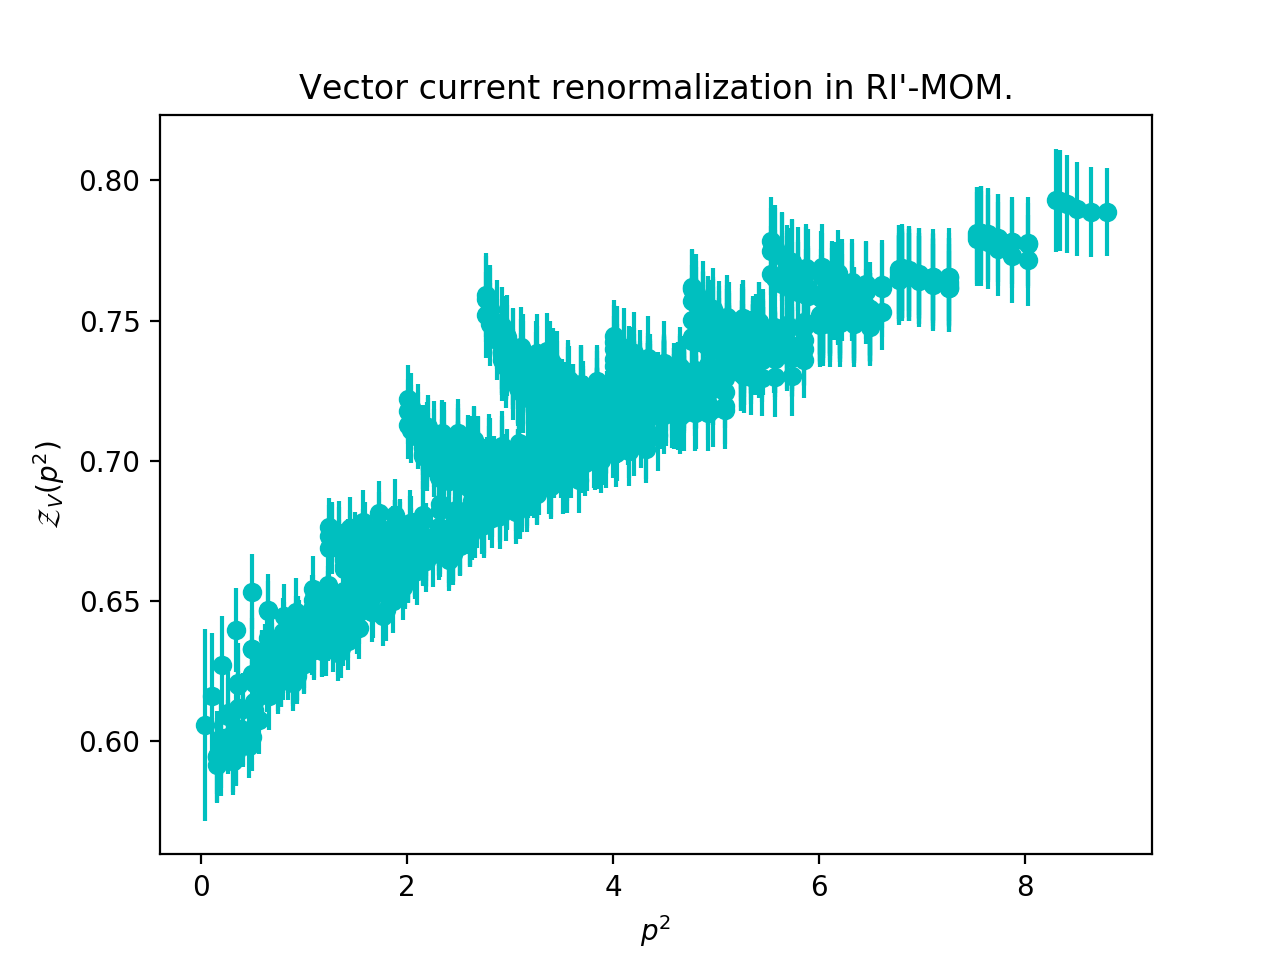

In [28]:
plt.figure()
plt.errorbar(pc_squared, np.real(ZV_μ), yerr = np.real(ZV_σ), fmt = 'o', c = 'c')
plt.title('Vector current renormalization in RI\'-MOM.')
plt.xlabel('$p^2$')
plt.ylabel('$\mathcal{Z}_V(p^2)$')
plt.show()

<IPython.core.display.Javascript object>


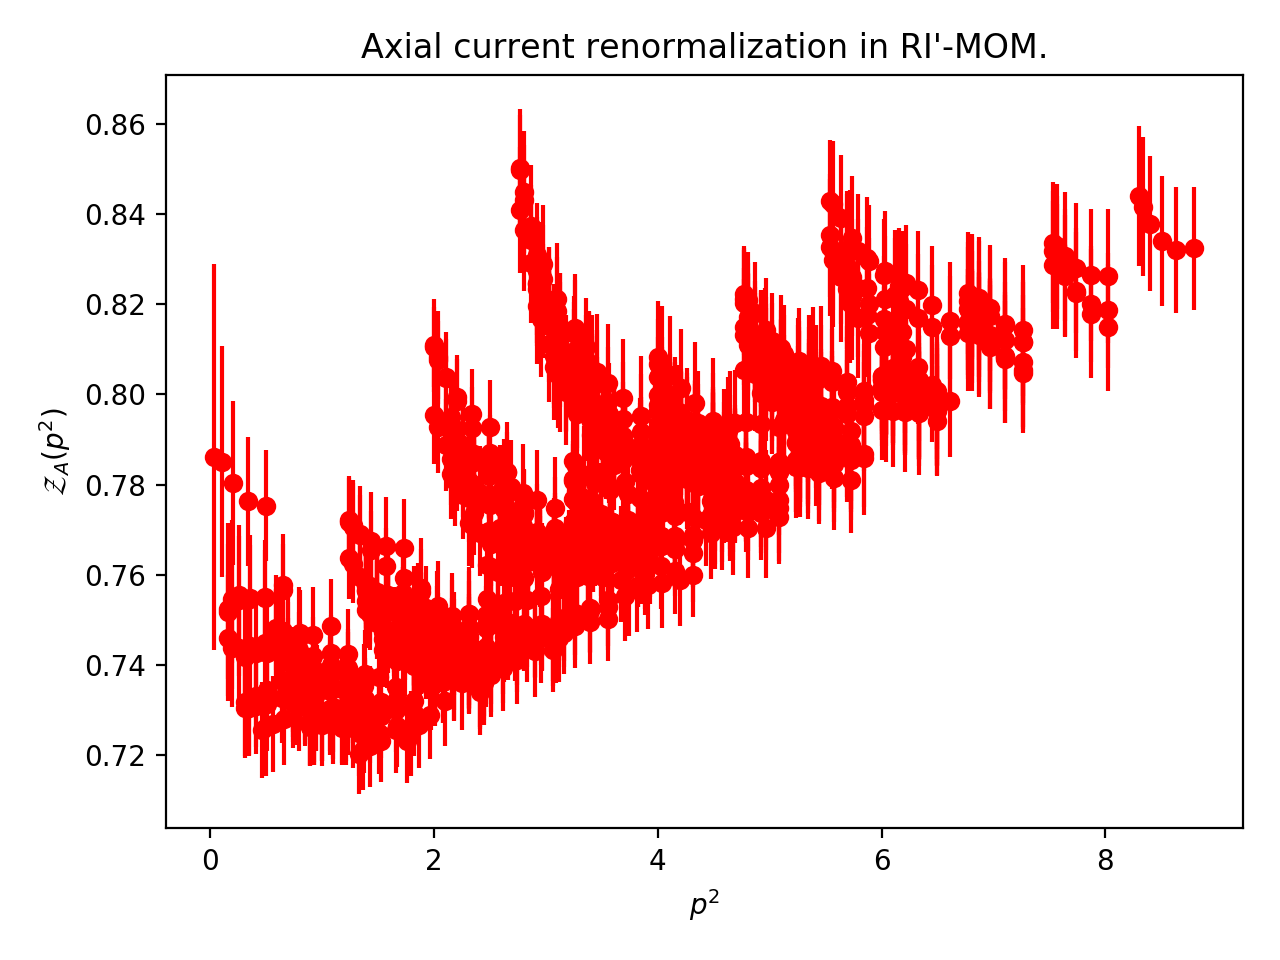

In [29]:
plt.figure()
plt.errorbar(pc_squared, np.real(ZA_μ), yerr = np.real(ZA_σ), fmt = 'o', c = 'r')
plt.title('Axial current renormalization in RI\'-MOM.')
plt.xlabel('$p^2$')
plt.ylabel('$\mathcal{Z}_A(p^2)$')
plt.tight_layout()
plt.show()

In [30]:
# plt.figure()
# plt.errorbar(pc_squared, np.real(Zcq_μ), yerr = np.real(Zcq_σ), fmt = 'o', c = 'b', label = 'point source')
# plt.ylabel('$\mathcal{Z}_q(p^2)$')
# plt.xlabel('$p^2$')
# plt.title('Quark field renormalization')

# plt.errorbar(psquared_Zq, np.real(Zq_wall), yerr = np.real(σZq_wall), fmt = 'o', c = 'y', label = 'wall source')
# plt.legend()
# plt.show()

<IPython.core.display.Javascript object>


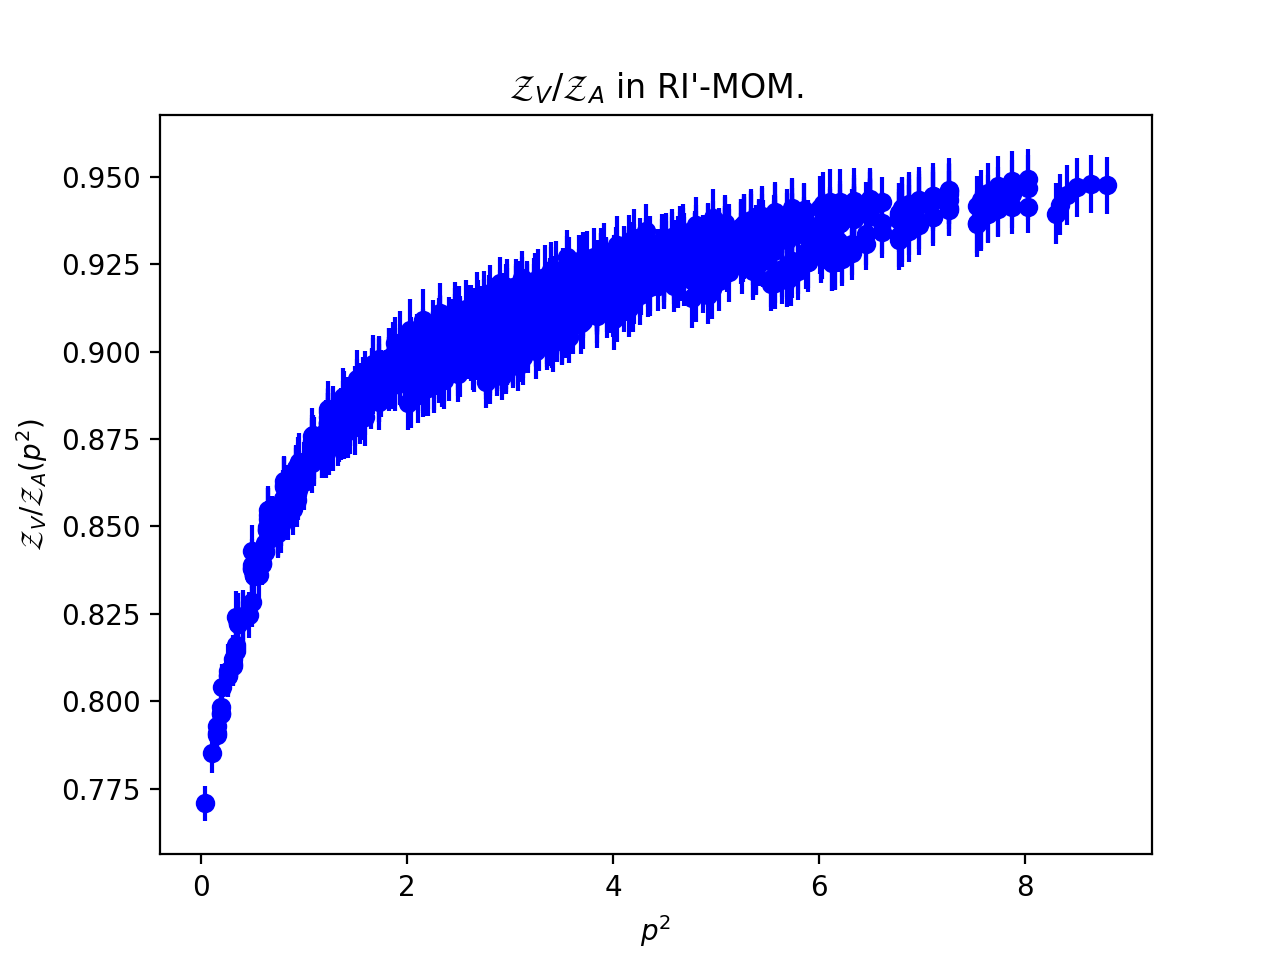

In [31]:
# use quark field renormalization to get Pi_A and Pi_V. Try to get the plots in Figure 4-2.
ZVA = ZV / ZA
ZVA_μ = np.mean(ZVA, axis = 1)
ZVA_σ = np.std(ZVA, axis = 1)
plt.figure()
plt.errorbar(pc_squared, np.real(ZVA_μ), yerr = np.real(ZVA_σ), fmt = 'o', c = 'b')
plt.title('$\mathcal{Z}_V / \mathcal{Z}_A$ in RI\'-MOM.')
plt.xlabel('$p^2$')
plt.ylabel('$\mathcal{Z}_V / \mathcal{Z}_A(p^2)$')
plt.show()